In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [ ]:
x,y=make_regression(n_samples=10000,n_features=10,n_informative=9,noise=10,random_state=1)

In [ ]:
plt.style.use('seaborn')

In [ ]:
x.shape,y.shape

((10000, 10), (10000,))

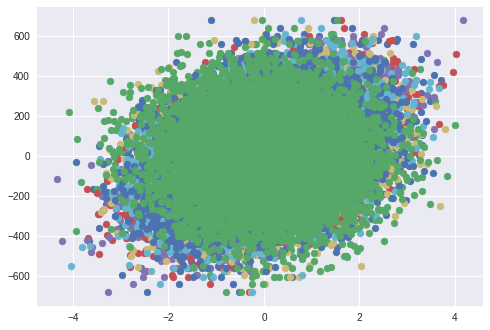

In [ ]:
for a in range(2,x.shape[1]):
  plt.scatter(x[:,a],y)

In [ ]:
x.shape

(10000, 10)

In [ ]:
xo=np.ones((x.shape[0],1))
x=np.hstack((xo,x))

In [ ]:
def hypothesis(X,theta):
  Y=np.dot(X,theta)
  return Y

In [ ]:
def gradient(X,Y,theta):
  m,n=X.shape
  grad=np.zeros((n,))
#  for j in range(n):
#    for i in range(m):
#         grad[j] += (hypothesis(X[i],theta)-Y[i])*X[i][j] 


  y_ = hypothesis(X,theta)
  grad = np.dot(X.T,(y_-Y))

  return grad/m

In [ ]:
def gradient_descent(X,Y,max_step=100,lr=0.1):
  theta=np.zeros(X.shape[1])
  err=[]
  theta_li=[]
  for i in range(max_step):
    gradi=gradient(X,Y,theta) 
    e=error(X,Y,theta)
    err.append(e)
    theta=theta-lr*gradi
    theta_li.append(theta)
    
  return theta,err,theta_li

In [ ]:
def error(X,Y,theta):
  er=0.0
  y_=hypothesis(X,theta)
  er=np.sum((Y-y_)**2)
  return er/X.shape[0]


In [ ]:
th,err,theta_list=gradient_descent(x,y)

Variation in theta with Gradient Decsent


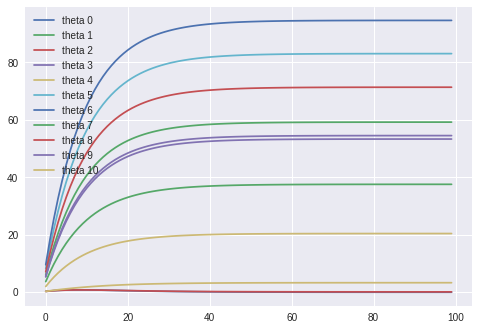

In [ ]:
theta_list=np.asarray(theta_list)
for a in range(theta_list.shape[1]):
  plt.plot(theta_list[:,a],label='theta %d'%a)
  plt.legend()

Reduction In error with Iteration


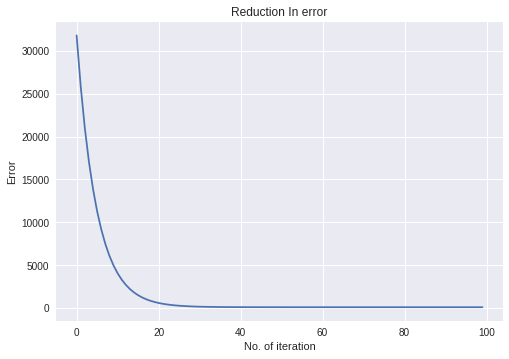

In [ ]:
err=np.asarray(err)
plt.plot(np.arange(len(err)),err)
plt.title('Reduction In error')
plt.ylabel('Error')
plt.xlabel('No. of iteration')
plt.show()

In [ ]:
y_pred=hypothesis(x[9000:,:],th)

Calculation Of R2 squared Error.

In [ ]:
def score(y,y_):
  num=np.sum((y-y_)**2)
  deno=np.sum((y-y.mean())**2)
  return 1-(num/deno)

In [ ]:
print(score(y[9000:],y_pred))

0.9967525097949306


Gadient Decesent using mini batch optimization.

In [ ]:
def mini_batch_gradient_descent(X,Y,max_step=100,batch_size=100,lr=0.1):
  theta=np.zeros(X.shape[1])
  err=[]
  data=np.hstack((X,Y.reshape(-1,1)))
  for i in range(max_step):

    
    np.random.shuffle(data)
    batches=X.shape[0]//batch_size
    for a in range(batches):
      batch_data=data[a*batch_size:(a+1)*batch_size,:]
      batch_data_x=batch_data[:,:-1]
      batch_data_y=batch_data[:,-1]
      batch_grad=gradient(batch_data_x,batch_data_y,theta) 
      theta=theta-lr*batch_grad
      e=error(batch_data_x,batch_data_y,theta)
      err.append(e)

  return theta,err

In [ ]:
batch_theta,erro=mini_batch_gradient_descent(x,y)

with mini batch optimization reduction in error or convergence of loss function is fast but with noise.


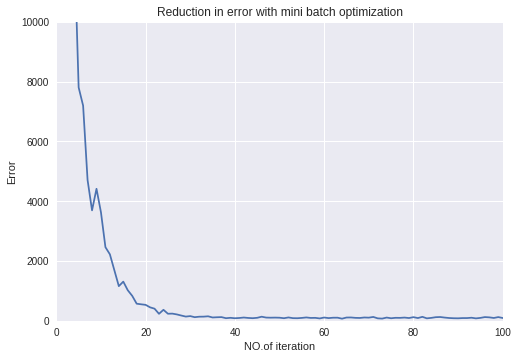

In [ ]:
fig, ax = plt.subplots()
  
ax.set_title('Reduction in error with mini batch optimization')
  
ax.set_ylabel('Error')
ax.set_xlabel('NO.of iteration')
  
ax.set_xlim(0, 100)
ax.set_ylim(0, 10000)
  
ax.plot(erro)
plt.show()

In [ ]:
err[-1]

100.5200355302978

In [ ]:
erro[-1]

103.05038708024956